In [1]:
# libaries
import pandas as pd
import numpy as np 
import math
import matplotlib as plt 
import seaborn as sns
import plotly.express as px
import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'C:\Users\kalas\OneDrive\Desktop\classroom\DecisionTreesFoundations\breast_cancer_data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
print("shape: ", df.shape)
print("_"*40)
print("columns: ", df.columns)
print("_"*40)
print("dtypes: \n", df.dtypes)
print("_"*40)
print(df.info())
print("_"*40)
print("Null value check \n" ,df.isnull().sum())


shape:  (569, 33)
________________________________________
columns:  Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
________________________________________
dtypes: 
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoot

In [3]:
print("dropping the redundant\n ")

df.drop(columns= ['id' , 'Unnamed: 32'], axis = 1 , inplace=True)

df.shape

dropping the redundant
 


(569, 31)

### EDA


In [4]:
df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
print("Unique value in the Output label \n")
df['diagnosis'].unique() 

# M : Malignant  ,   B : Benign

Unique value in the Output label 



array(['M', 'B'], dtype=object)

In [6]:
# Output label / Target variable / y- label : data distribution
# pie-plot : proporation of M v/s B

px.pie(df ,
       'diagnosis' , 
       color= 'diagnosis' , 
       color_discrete_sequence= ['#007500' , '#5CFF5C'],
       title="Data Distribution")


# Inferences :
# dataset is imbalanced (M : B = 63:37)
# there are more cases of benign tumors than malignant tumors
# for imbalanced dataset , accuracy can be a misleading metric
#  for example , if 90% of the cases are benign , the model will always predict "bening"
#  in such cases , we need "Balanced accuracy"

In [7]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
#  visually compare the distribution of each feature
# for malignant tumours versus bening
# for a given feature , do its values tend to be different for malignant vs benign cases

for column in df.drop("diagnosis" , axis = 1).columns[:5]:
    # for loop auto iterates through the first five feature columns in dataframe
    fig = px.box(data_frame= df , 
                 x = 'diagnosis' , 
                 color= 'diagnosis' ,
                 y = column , 
                 color_discrete_sequence = ['#007500' , '#5CFF5C'] , 
                 orientation= 'v')
    fig.show()

In [9]:
for column in df.drop("diagnosis" , axis = 1).columns[5:10]:
    # for loop auto iterates through the first five feature columns in dataframe
    fig = px.scatter(data_frame= df , 
                 x = column , 
                 color= 'diagnosis' ,
                 color_discrete_sequence = ['#007500' , '#5CFF5C'] , 
                 orientation= 'v')
    fig.show()

### Creating correlation with the target variable


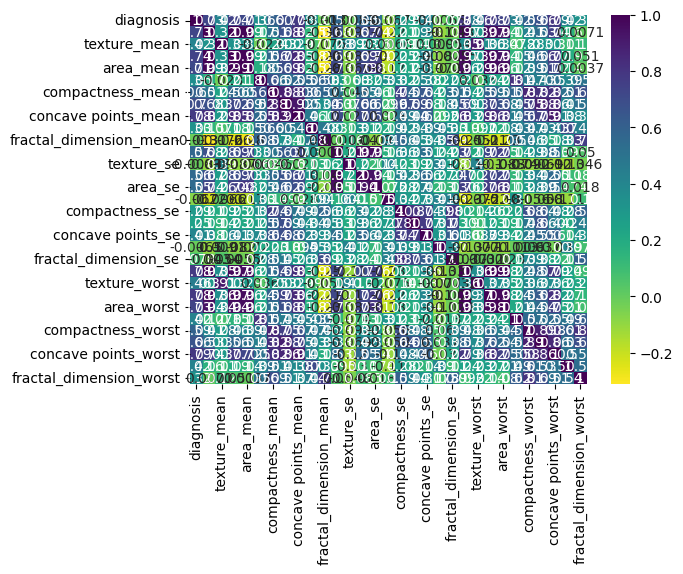

In [10]:
# diagnosis : M or B : categorical
# encode : 1 or 0 : categorical

import matplotlib.pyplot as plt
import seaborn as sns

df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)
# this line converts the categorical feature into numericalse
# setting M = 1 then B = 0

# take the correlation
corr = df.corr()


# Correlation with target
cor_target = corr['diagnosis']
top_features = cor_target.sort_values(ascending=False)[1:11].index
# heatmap
sns.heatmap(corr , cmap ='viridis_r' , annot=True)

plt.show()

# correlation : -1 to 1

In [11]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Feature Selection

In [12]:
# We should now choose which features are good enough predictors to be used to train the model

# get the absoulte correlation

cor_target = abs(corr['diagnosis'])

# select better correlated features
# this is the filtering step of feature selection
# it creates a new list of relevant features

relevant_features = cor_target[cor_target > 0.25]

# 0.25 is user defined. It is the hyper-parameter value 

# collect the names of features
# list comprehension

names = [index  for index,value in relevant_features.items()]

# Dtop the target vairable from the results
names.remove("diagnosis")

pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


### Assign training data and training labels

In [13]:
# define features (all except target column)
names = df.columns.drop('diagnosis')
x = df[names].values
y = df['diagnosis'].values.reshape(-1 , 1)
      
# this line creates target vector or a target label
# df['diagnosis'].values : (569,1)

In [14]:
print("Input features are: ",x.shape ,"Output label shape is : ", y.shape)

Input features are:  (569, 30) Output label shape is :  (569, 1)


In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# we need to scale

# Standize / Z - score normalization
# apply on X

import numpy as np

def scale(X):
    '''
    parameters : numpy.ndarray)
    
    returns : numpy.ndarray
    
    Standardize the features by removing the mean and scaling to unit variance.
    '''
    
    mean = np.mean(X , axis = 0)
    std = np.std(X , axis = 0)
    
        # Avoid divide-by-zero error if std contains zeros
    std[std == 0] = 1  
    
    # Standardize this data
    X = (X -mean) / std
    
    return X


# Example data
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

X_scaled = scale(X)
print(X_scaled)



    

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


### Model Implementation

In [17]:
# we will start with all the examples at the root nodes
# Then we will calculate the information gain for each feature / gini index for each feature
# then we will pick the feature with the highest information gain / gini index
# then we will split the data according to selected feature
# we will repeat this process until we reach the stopping criteria


# Node Class

class Node:
    def __init__(self , feature = None , threshold = None ,left = None , right = None , gain = None , value = None):
        
        '''
        Initializes a Node.
        
        Parameters:
        - feature : the index of the feature to split on.
        - threshold : the threshold value for the split. Defaults to None
        - left : the left child node. default to none
        - right : the right child node. default to none
        - value : the class label if it's a leaf node.
        
        '''
        
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value
        
        
'''
Explanation :

 self.threshold = threshold
 self.feature = feature 

the above two are used by the decision nodes. 
they store the question being asked at this node.
for example , " is the radius_mean < 15.5 ? "



self.left = left
self.right = right

used by decision nodes to point to the left and right child nodes.
they are also called pointer nodes.



 self.value = value
used by leaf nodes to store the class label.
if a node is a final endpoint . it does not ask any questions
it holds prediacted class label or prediciton for each branch
self.value will be 0(benign)  or  1(malignant) for leaf nodes



self.gain = gain
used by decision nodes to store the information gain or gini index of the split.
'''

'\nExplanation :\n\n self.threshold = threshold\n self.feature = feature \n\nthe above two are used by the decision nodes. \nthey store the question being asked at this node.\nfor example , " is the radius_mean < 15.5 ? "\n\n\n\nself.left = left\nself.right = right\n\nused by decision nodes to point to the left and right child nodes.\nthey are also called pointer nodes.\n\n\n\n self.value = value\nused by leaf nodes to store the class label.\nif a node is a final endpoint . it does not ask any questions\nit holds prediacted class label or prediciton for each branch\nself.value will be 0(benign)  or  1(malignant) for leaf nodes\n\n\n\nself.gain = gain\nused by decision nodes to store the information gain or gini index of the split.\n'

In [18]:
# building the decision tree

class DecisionTree:
    '''
    this is a decision tree classifier.
    '''
    def __init__(self , min_samples = 2 , max_depth = 3):
        self.min_samples = min_samples
        self.max_depth = max_depth
        
        "we are setting hyper-parameters to control the growth of the tree prevent overfitting"
        
    def split_data(self , dataset , feature , threshold):
        '''
        splits the given dataset based on the feature and threshold.
        parameters:
        - dataset : the dataset to split.
        - feature : index of the feature to split on.
        - threshold : the threshold value for the split.
        
        Returns:
        left_dataset : subset of data with value less than or equal to the threshold
        right_dataset : subset of data with value greater than the threshold
        '''
        
        # create empty arrays
        left_dataset = []
        right_dataset = []
        
        # loop through each row in the dataset in left and right basis the feature and threshold
        
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)
              
        # convert the left and right dataset into numpy arrays  
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
                
        return left_dataset , right_dataset
    
    
    # write function to calculate entropy
    def entropy(self , y):
        '''
        computers the entropy for given labels
        entropy suggests impurity or disorder in the dataset.
        
        returns : float : entropy value
        
        '''
        
        entropy = 0.0
        # this initializes the entropy to zero 
        
        # use numpy's unique function to get the unique labels in y 
        labels = np.unique(y)
        
        for label in labels:
            # find examples in y that have the current label
            label_examples = y[y == label]
            # calculate the ratio of current label in y
            pl = len(label_examples) / len(y)
            # calculate the entropy for the current label and ratio
            entropy += -pl * np.log2(pl)
            
            return entropy
    
    # write function to calculate gini index / information gain
    
    def information_gain(self , parent , left , right):
        '''
        computes the information gain from splitting the parent dataset into two dataset.
        
        parameters:
        left : subset of parent dataset after the split on the feature
        right : subset of parent dataset after the split on the feature
        
        Returns :
        Information gain on the split : float
        '''
        
        # intialize the information gain to zero 
        information_gain = 0.0
        # compute the entropy of the parent dataset
        parent_entropy = self.entropy(parent)
        # calculate the weights for left and right dataset / nodes
        weight_left = len(left) / len(parent)
        weight_right = len(right) / len(parent)
        # compute the entropy of the left and right dataset / nodes
        entropy_left , entropy_right = self.entropy(left) , self.entropy(right)
        # calculate the weighted entropy
        weighted_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)
        # calculate the information gain 
        information_gain = parent_entropy - weighted_entropy
        
        return information_gain
    
    # function to get the best split
    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain,
              left and right datasets.
        """
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index] # column2 
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split
    
    
    
    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value
    
    
    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)
    
    
    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)
        self.root = self.build_tree(dataset)
        
        
    
    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
    
    
    
    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None:
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)
    

In [19]:
# Evaluation 

# X_train,y_train, X_test,y_test = train_test_split(X, y, random_state=41, test_size=0.2)

def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0] # rows are samples

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [20]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred) # i want the total number where the actual and prediction is exactly the same
    return (correct_predictions / total_samples)

In [21]:
def balanced_accuracy(y_true, y_pred):
    """Calculate the balanced accuracy for a multi-class classification problem.

    Parameters
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns
    -------
        balanced_acc : The balanced accuracyof the model

    """
    y_pred = np.array(y_pred)
    y_true = y_true.flatten()
    # Get the number of classes
    n_classes = len(np.unique(y_true))

    # Initialize an array to store the sensitivity and specificity for each class
    sen = []
    spec = []
    # Loop over each class
    for i in range(n_classes):
        # Create a mask for the true and predicted values for class i
        mask_true = y_true == i
        mask_pred = y_pred == i

        # Calculate the true positive, true negative, false positive, and false negative values
        TP = np.sum(mask_true & mask_pred)
        TN = np.sum((mask_true != True) & (mask_pred != True))
        FP = np.sum((mask_true != True) & mask_pred)
        FN = np.sum(mask_true & (mask_pred != True))

        # Calculate the sensitivity (true positive rate) and specificity (true negative rate)
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)

        # Store the sensitivity and specificity for class i
        sen.append(sensitivity)
        spec.append(specificity)
    # Calculate the balanced accuracy as the average of the sensitivity and specificity for each class
    average_sen =  np.mean(sen)
    average_spec =  np.mean(spec)
    balanced_acc = (average_sen + average_spec) / n_classes

    return balanced_acc

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

In [23]:
# sklearn implementation 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Create a decision tree classifier model object.
decision_tree_classifier = DecisionTreeClassifier()

# Train the decision tree classifier model using the training data.
decision_tree_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
predictions = decision_tree_classifier.predict(X_test)

# Calculate evaluating metrics
print(f"Model's Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy_score(y_test, predictions)}")


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required by DecisionTreeClassifier.

In [ ]:
# classification report 
# confusion matrix
# TP,TN,FP,FN
# precision , recall